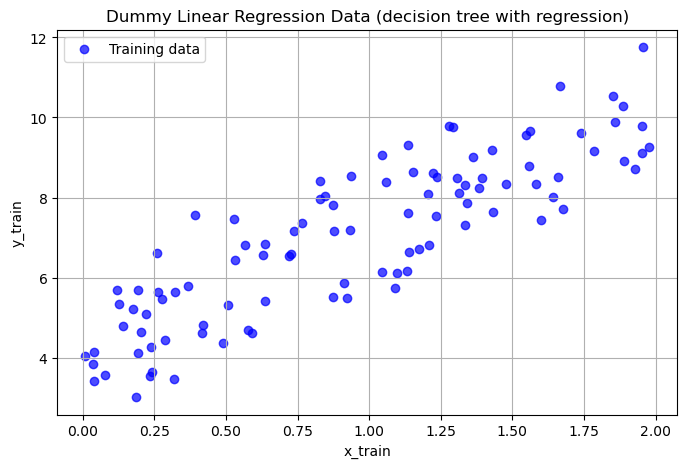

Features shape is: (100, 1)
Target shape is: (100, 1)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(0)

# Number of samples
num_samples = 100

# Generate random x values (features)
x_train = 2 * np.random.rand(num_samples, 1)

true_slope = 3
true_intercept = 4
noise = np.random.randn(num_samples, 1)

y_train = true_intercept + true_slope * x_train + noise

# Plotting the data
plt.figure(figsize=(8, 5))
plt.scatter(x_train, y_train, color="blue", label="Training data", alpha=0.7)
plt.title("Dummy Linear Regression Data (decision tree with regression)")
plt.xlabel("x_train")
plt.ylabel("y_train")
plt.legend()
plt.grid(True)
plt.show()

print("Features shape is:",x_train.shape)
print("Target shape is:",y_train.shape)

In [6]:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index  
        self.threshold = threshold          
        self.left = left                    
        self.right = right                  
        self.value = value

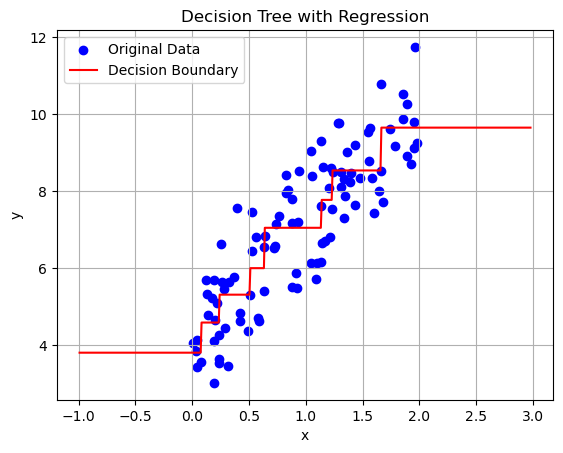

In [10]:
def variance(y):
    if len(y)==0:
        return 0
    return np.mean((y-np.mean(y))**2)

def best_node(x,y):
    best_score = float("inf")
    best_thresh = None
    for i in np.unique(x):
        left_y = y[x<=i]
        right_y = y[x>i]
        variance_score = variance(left_y)*len(left_y) + variance(right_y)*len(right_y)
        if variance_score < best_score: 
            best_score = variance_score
            best_thresh = i
    return best_thresh

def decision_tree(x,y,d=0,m_d = 3):
    if d == m_d or len(np.unique(y))==1:
        return np.mean(y)
    threshold = best_node(x,y)
    if threshold is None:
        return np.mean(y)
    left = x<= threshold
    right = x>threshold
    left_tree  = decision_tree(x[left],y[left],d+1,m_d)
    right_tree = decision_tree(x[right],y[right],d+1,m_d)
    return threshold,left_tree,right_tree

def predict(tree,x_v):
    if not isinstance(tree, tuple):
        return tree
    threshold,left_tree,right_tree = tree
    if x_v <= threshold:
        return predict(left_tree,x_v)
    else:
        return predict(right_tree,x_v)

tree = decision_tree(x_train,y_train,d=0,m_d =3)

x_test = np.linspace(min(x_train) - 1, max(x_train) + 1, 500)
y_pred = [predict(tree, i) for i in x_test]
plt.scatter(x_train, y_train, color='blue', label='Original Data')
plt.plot(x_test, y_pred, color='red', label='Decision Boundary')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Tree with Regression')
plt.legend()
plt.grid(True)
plt.show()